In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import ast
import warnings
warnings.filterwarnings('ignore')

# Load the data into a pandas DataFrame
df = pd.read_csv('data.csv')

# Drop the 'Name' column to protect personal information (if present)
if 'Name' in df.columns:
    df.drop(columns=['Name'], inplace=True)

# Convert 'Social Media Platforms' from string representation to actual lists
df['Social Media Platforms'] = df['Social Media Platforms'].apply(ast.literal_eval)

# Clean 'Influence on Purchase Decision' to have a consistent categorical order
influence_order = ['Very unlikely', 'Unlikely', 'Neutral', 'Somewhat likely', 'Very likely']
df['Influence on Purchase Decision'] = pd.Categorical(df['Influence on Purchase Decision'], categories=influence_order, ordered=True)

# Clean 'Continued Influence Post-Pandemic' to have a consistent categorical order
continued_influence_order = ['No, not at all', 'No, not really', 'Yes, to some extent', 'Yes, definitely']
df['Continued Influence Post-Pandemic'] = pd.Categorical(df['Continued Influence Post-Pandemic'], categories=continued_influence_order, ordered=True)

# Encode categorical variables for statistical tests
df['Influence_Numeric'] = df['Influence on Purchase Decision'].cat.codes
df['Continued_Influence_Numeric'] = df['Continued Influence Post-Pandemic'].cat.codes

# Map Age Groups to numerical values for grouping
df['Age_Numeric'] = df['Age Group'].map({
    '18-24': 'Younger',
    '25-34': 'Younger',
    '35-44': 'Older',
    '45-54': 'Older',
    '55 and above': 'Older'
})

# Display the first few rows of the DataFrame
df.head()


,Age Group,Gender,Social Media Platforms,Influence on Purchase Decision,Shopping Behavior During Pandemic,Continued Influence Post-Pandemic,Influence_Numeric,Continued_Influence_Numeric,Age_Numeric
0,45-54,Other,"[TikTok, Pinterest]",Neutral,Decreased offline shopping,"Yes, to some extent",2,2,Older
1,18-24,Male,"[Twitter, Instagram]",Somewhat likely,Shifted to more sustainable brands,"No, not really",3,1,Younger
2,55 and above,Female,"[Facebook, Pinterest]",Somewhat likely,Shifted to more sustainable brands,"No, not really",3,1,Older
3,35-44,Other,"[Twitter, YouTube]",Very likely,No significant change,"No, not at all",4,0,Older
4,25-34,Male,"[YouTube, TikTok, Twitter]",Very likely,Decreased offline shopping,"No, not at all",4,0,Younger



Chi-square Test between Age Group and Influence on Purchase Decision
Chi-square value: 17.39840585232691
Degrees of freedom: 16
P-value: 0.3602801824670527
Result: No significant association (fail to reject H0)


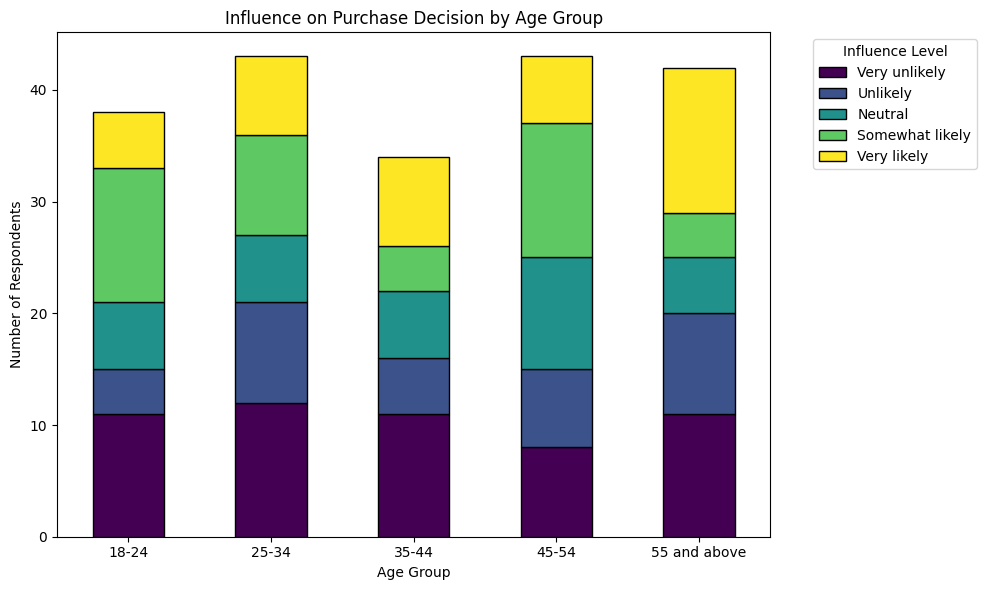

In [ ]:
# 1. Chi-Square Test
# Association Between Age Group and Influence on Purchase Decision


# Create a contingency table
contingency_table = pd.crosstab(df['Age Group'], df['Influence on Purchase Decision'])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-square Test between Age Group and Influence on Purchase Decision")
print("Chi-square value:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

# Interpretation
if p < 0.05:
    print("Result: Significant association (reject H0)")
else:
    print("Result: No significant association (fail to reject H0)")

# Visualization
contingency_table.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))
plt.title('Influence on Purchase Decision by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Influence Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Z-Test for Proportion of Respondents Influenced
Proportion influenced: 0.4
Z-value: -2.8284271247461894
P-value: 0.004677734981047177
Result: Proportion is significantly different from 50% (reject H0)


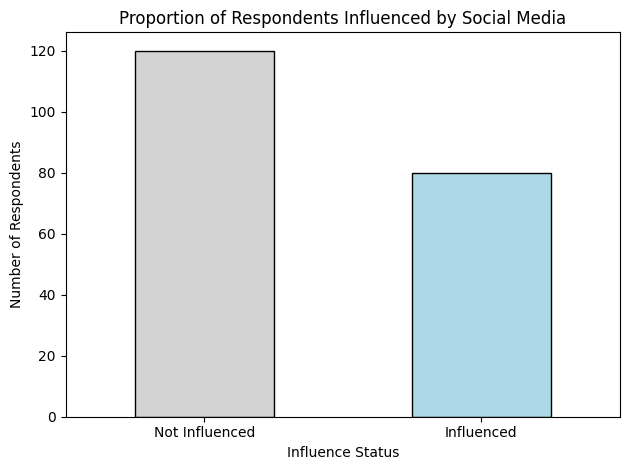

In [ ]:
# 2. Z-Test
# Comparing Proportion of Respondents Influenced vs. Not Influenced

# Define influenced respondents (Somewhat likely or Very likely)
df['Influenced'] = df['Influence on Purchase Decision'].isin(['Somewhat likely', 'Very likely'])

# Calculate sample proportion
p_hat = df['Influenced'].mean()
n = len(df)

# Hypothesized proportion
p0 = 0.5

# Calculate standard error
se = np.sqrt(p0 * (1 - p0) / n)

# Calculate Z-statistic
z = (p_hat - p0) / se

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print("\nZ-Test for Proportion of Respondents Influenced")
print("Proportion influenced:", p_hat)
print("Z-value:", z)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Proportion is significantly different from 50% (reject H0)")
else:
    print("Result: Proportion is not significantly different from 50% (fail to reject H0)")

# Visualization
influenced_counts = df['Influenced'].value_counts()
influenced_counts.index = ['Not Influenced', 'Influenced']
influenced_counts.plot(kind='bar', color=['lightgray', 'lightblue'], edgecolor='black')
plt.title('Proportion of Respondents Influenced by Social Media')
plt.xlabel('Influence Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


T-Test Comparing Mean Influence Scores Between Age Groups
T-statistic: -0.5338940483185337
P-value: 0.5940911733411467
Result: No significant difference in mean influence scores (fail to reject H0)


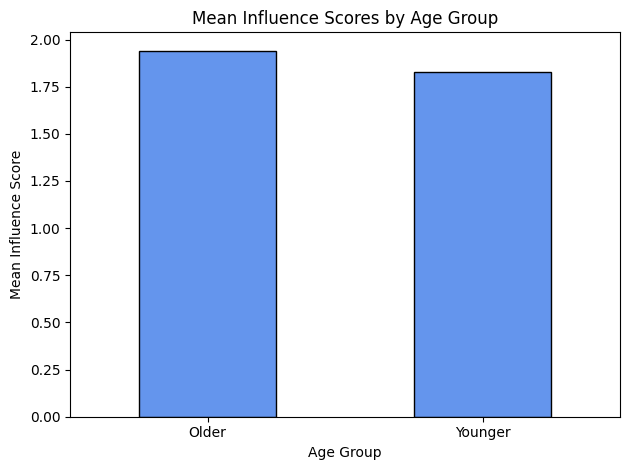

In [ ]:
# 3. T-Test
# Comparing Mean Influence Scores Between Younger and Older Respondents


# Get influence scores for each group
younger_influence = df[df['Age_Numeric'] == 'Younger']['Influence_Numeric'].dropna()
older_influence = df[df['Age_Numeric'] == 'Older']['Influence_Numeric'].dropna()

# Perform T-test (assuming unequal variances)
t_stat, p_value = stats.ttest_ind(younger_influence, older_influence, equal_var=False)

print("\nT-Test Comparing Mean Influence Scores Between Age Groups")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Significant difference in mean influence scores (reject H0)")
else:
    print("Result: No significant difference in mean influence scores (fail to reject H0)")

# Visualization
mean_influence_scores = df.groupby('Age_Numeric')['Influence_Numeric'].mean()

mean_influence_scores.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Mean Influence Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Influence Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


F-Test Comparing Variance in Influence Scores Between Genders (Male vs. Female)
F-statistic: 1.0255950513245775
P-value: 0.463678279588021
Result: No significant difference in variances (fail to reject H0)


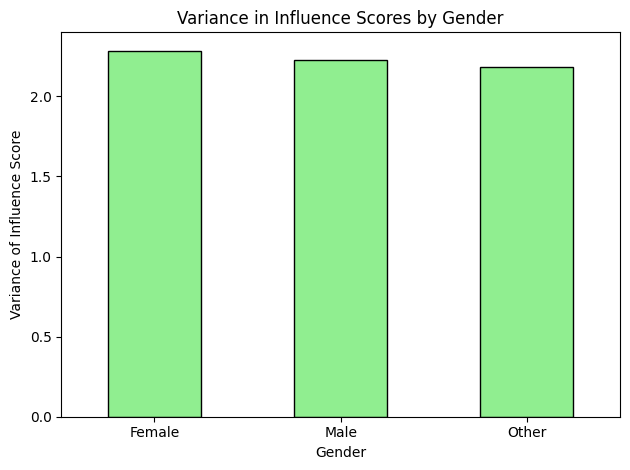

In [ ]:
# 4. F-Test
# Comparing Variance in Influence Scores Between Genders


# Get influence scores for each gender
male_influence = df[df['Gender'] == 'Male']['Influence_Numeric'].dropna()
female_influence = df[df['Gender'] == 'Female']['Influence_Numeric'].dropna()

# Variances
var_male = np.var(male_influence, ddof=1)
var_female = np.var(female_influence, ddof=1)

# Perform F-test
f_stat = var_male / var_female if var_male > var_female else var_female / var_male
dfn = len(male_influence) - 1
dfd = len(female_influence) - 1
p_value = 1 - stats.f.cdf(f_stat, dfn, dfd)

print("\nF-Test Comparing Variance in Influence Scores Between Genders (Male vs. Female)")
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Variances are significantly different (reject H0)")
else:
    print("Result: No significant difference in variances (fail to reject H0)")

# Visualization
variance_influence_scores = df.groupby('Gender')['Influence_Numeric'].var()

variance_influence_scores.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Variance in Influence Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Variance of Influence Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

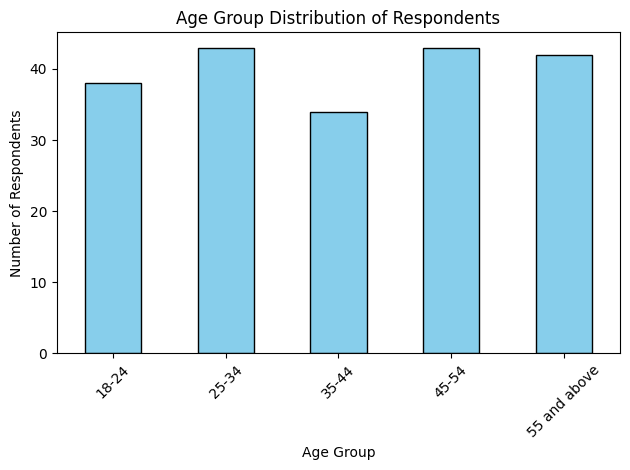

In [ ]:
# Additional Visualizations
# 1. Age Group Distribution

age_counts = df['Age Group'].value_counts().sort_index()

age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Group Distribution of Respondents')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


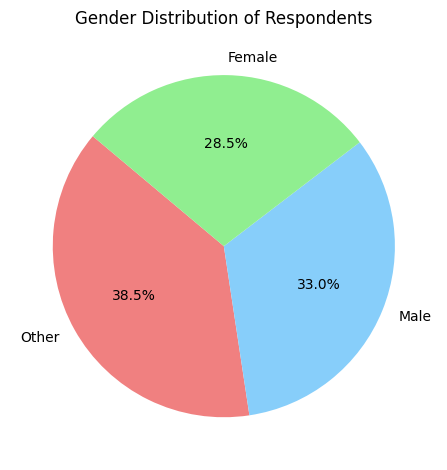

In [ ]:

# 2. Gender Distribution
gender_counts = df['Gender'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Gender Distribution of Respondents')
plt.ylabel('')
plt.tight_layout()
plt.show()

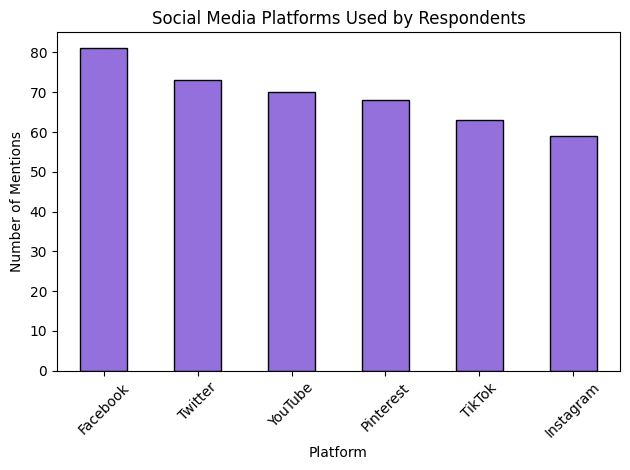

In [ ]:
# 3. Social Media Platforms Usage
from collections import Counter

platforms = df['Social Media Platforms'].explode()
platform_counts = platforms.value_counts()

platform_counts.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Social Media Platforms Used by Respondents')
plt.xlabel('Platform')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


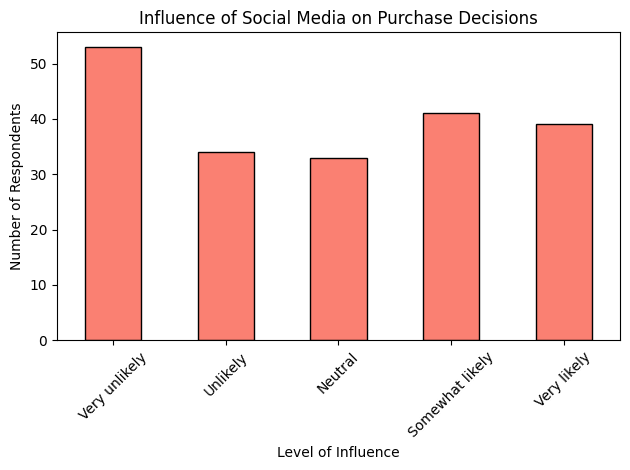

In [ ]:
#4. Influence on Purchase Decision
influence_counts = df['Influence on Purchase Decision'].value_counts().sort_index()

influence_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Influence of Social Media on Purchase Decisions')
plt.xlabel('Level of Influence')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


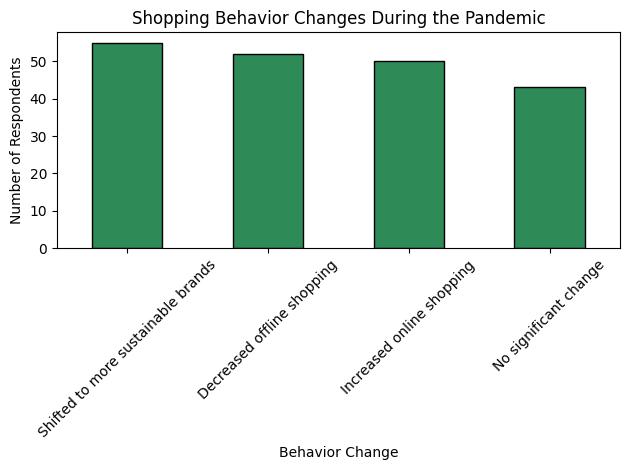

In [ ]:
# 5. Shopping Behavior During the Pandemic

shopping_behavior_counts = df['Shopping Behavior During Pandemic'].value_counts()

shopping_behavior_counts.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title('Shopping Behavior Changes During the Pandemic')
plt.xlabel('Behavior Change')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

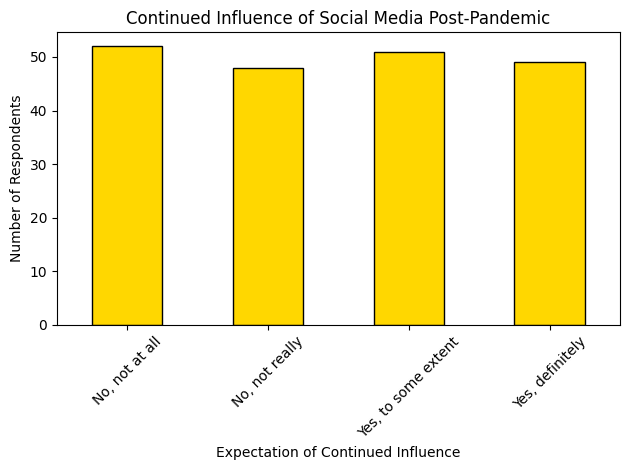

In [ ]:
#6. Continued Influence Post-Pandemic

continued_influence_counts = df['Continued Influence Post-Pandemic'].value_counts().sort_index()

continued_influence_counts.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Continued Influence of Social Media Post-Pandemic')
plt.xlabel('Expectation of Continued Influence')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


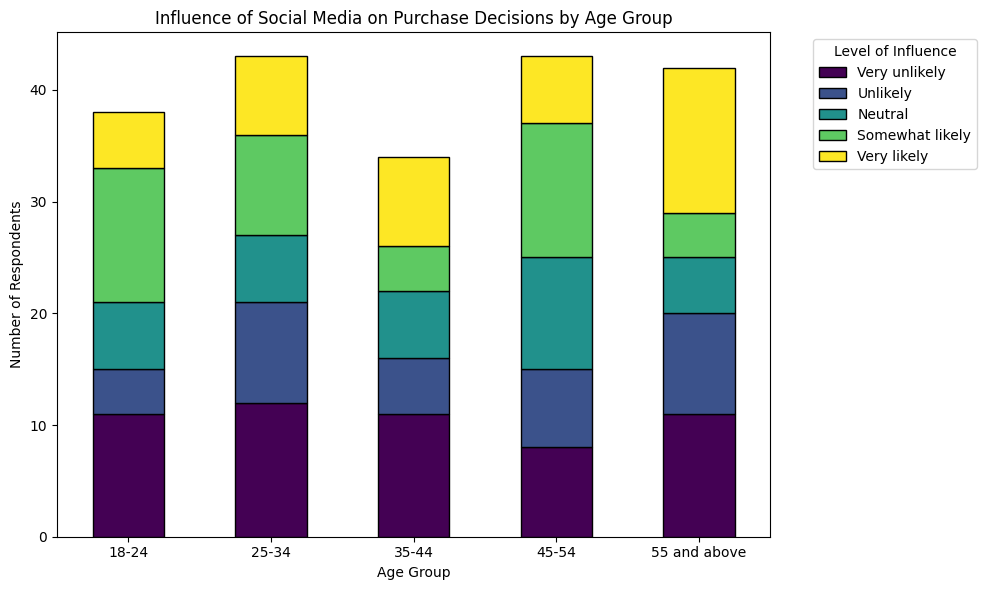

In [ ]:
#7. Influence Level by Age Group

age_influence_crosstab = pd.crosstab(df['Age Group'], df['Influence on Purchase Decision'])

age_influence_crosstab.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))
plt.title('Influence of Social Media on Purchase Decisions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Level of Influence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

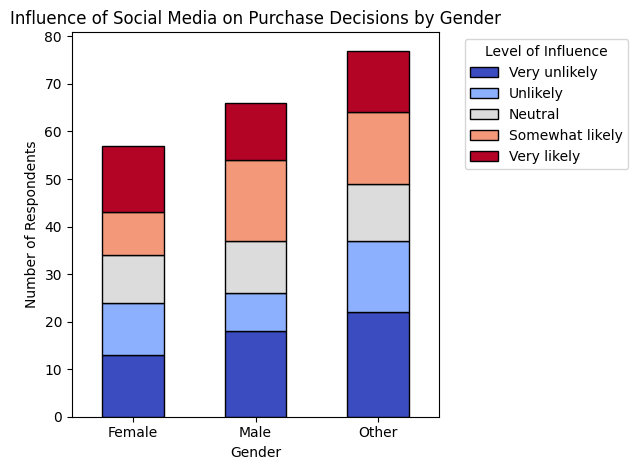

In [ ]:
# 8. Influence Level by Gender
gender_influence_crosstab = pd.crosstab(df['Gender'], df['Influence on Purchase Decision'])

gender_influence_crosstab.plot(kind='bar', stacked=True, colormap='coolwarm', edgecolor='black')
plt.title('Influence of Social Media on Purchase Decisions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Level of Influence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


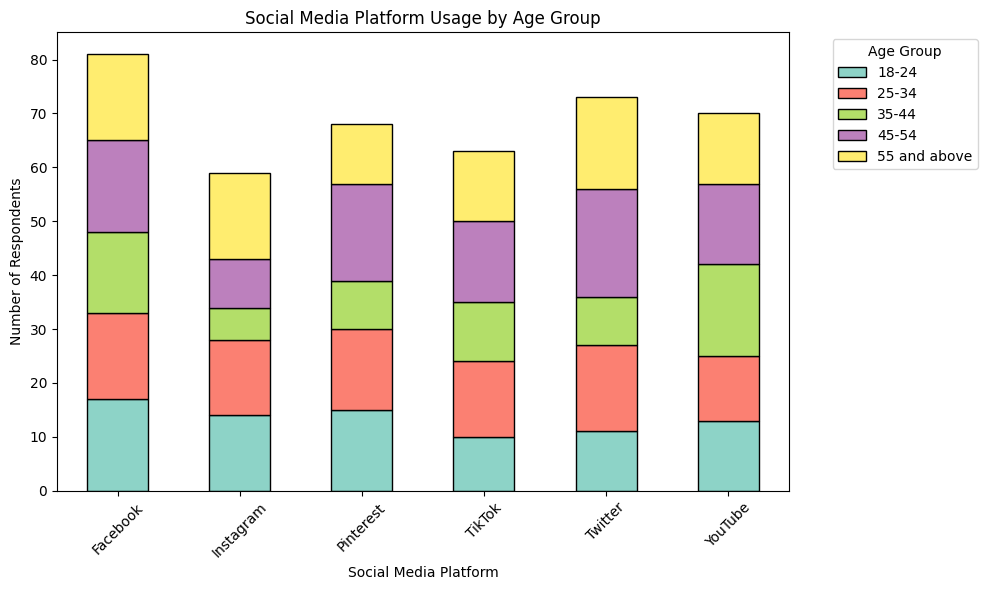

In [ ]:
# 9. Social Media Platform Usage by Age Group
platform_age = df.explode('Social Media Platforms')[['Age Group', 'Social Media Platforms']]

platform_age_crosstab = pd.crosstab(platform_age['Social Media Platforms'], platform_age['Age Group'])

platform_age_crosstab.plot(kind='bar', stacked=True, colormap='Set3', edgecolor='black', figsize=(10, 6))
plt.title('Social Media Platform Usage by Age Group')
plt.xlabel('Social Media Platform')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

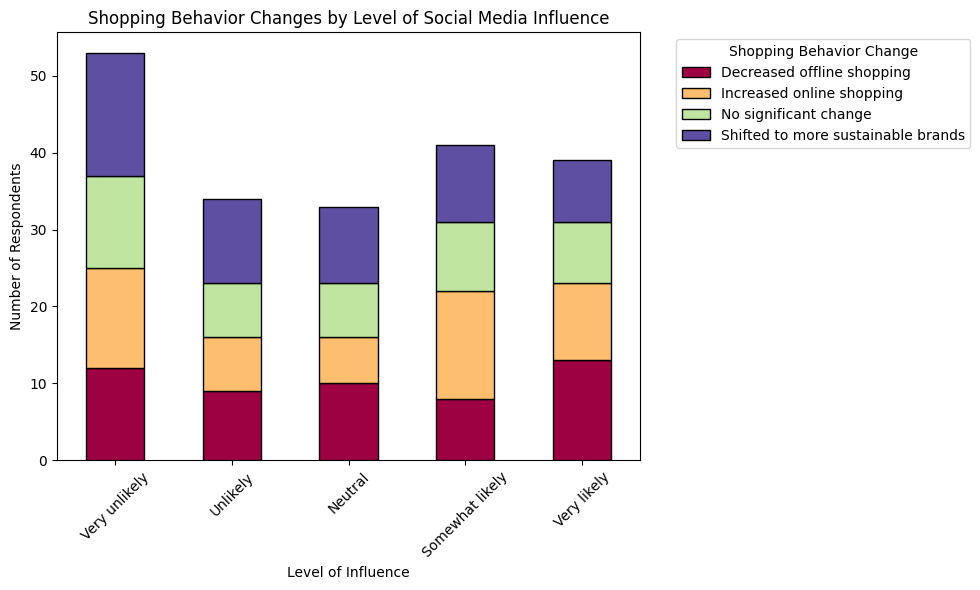

In [ ]:
# 10. Changes in Shopping Behavior by Influence Level

influence_shopping_crosstab = pd.crosstab(df['Influence on Purchase Decision'], df['Shopping Behavior During Pandemic'])

influence_shopping_crosstab.plot(kind='bar', stacked=True, colormap='Spectral', edgecolor='black', figsize=(10, 6))
plt.title('Shopping Behavior Changes by Level of Social Media Influence')
plt.xlabel('Level of Influence')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Shopping Behavior Change', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
